<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando o spark no colab

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 21.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=b8ef6a625a19f9c3dc73c37d2ec0cecf7bc8b950055e3892ed9ca777b54f3767
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


O spark é um sistema de computação de processamento distribuído, ou seja, ele trabalha em clusters(nó) - diversos computadores, é de código aberto, ou seja, qualuqer desenvolvedor pode contribuir para o projeto e que processa grande quantidade de dados rapidamente.
Ou seja, o spark é responsável por processar uma grande quantidade de dados de forma rápida

O drive do spark é como se fosse o coração do programa, aquele que coordena toda execução com os computadores em conjunto, ele é aonde as transformações dos dado. s e as lógicas são definidas. Ou seja, eu como desenvolvedor vou passar o meu código para o driver do spark para que ele coordene a execução das tarefas no cluster. Já o executor, a função dele é executar o código e a tarefa que o drive passou para ele e reporta o estado atua dele. O código é escrito através de uma sessão de sprak. O cluster manager ele gerencia todas as máquinas que serão executadas, por exemplo, de 100 computadores se 1 pifar, ele será responsávelpor pegar aquela tarefa e enviar para outra máquina fazer o processamento
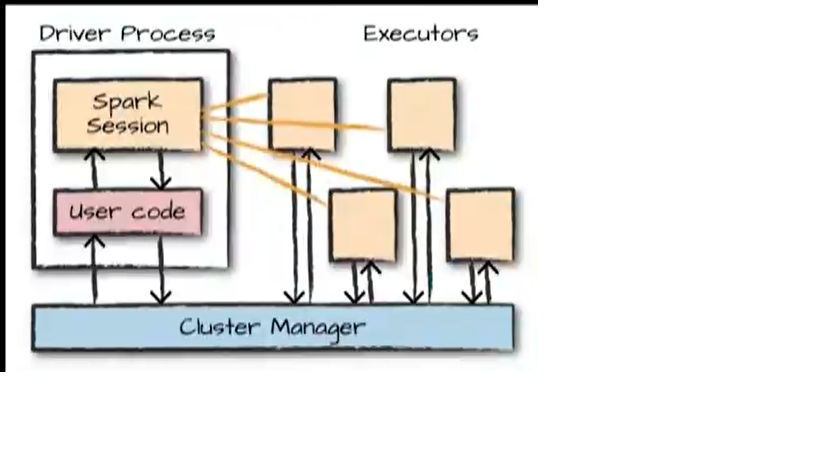

E o Lazy Evaluation, basicamente dentro do spark tem duas funções especificas: quando recebo um dado, ou seja, quando leio um csv, jason, excel...eu tenho duas formas de manipular aquele dado: ações e transformações. As transformações são a forma como escrevemos as principais lógicas de processamento, é como uma receita de bolo, quais são os passos par fazr o bolo. A ação vai olhar todos os passos da tranformação e vai executar. O spark vai esperar até o último minuto para executar seus processamentos porque ele cria um plano detalhado de todas as transformações, agrupa os dados de forma específica para que a ação seja a mais perfomática possível.
Exemplos de ações: collect(), count(), first()

Exemplos de transformações: filter(), select(), groupBy()

O RDD é uma coleção de dados que funciona de forma distribuída no clusters, ou seja, é como se eu pegasse um csv que contém uma lista de transações, transformo ela em RDD e esses dados são particionados no meu clusters spark. 

Antes de criar o RDD, deve criar uma maneira do spark comunicar com o clustering. As duas maneiras de fazer isso é através do SparkContext e SparkSession.

In [2]:
from pyspark import SparkContext

In [3]:
sc = SparkContext("local", "Primeiro Contexto Spark")

O argumento "local" é aonde nosso spark vai rodar, que nesse caso é no espaço local do google colab, depois escrever o nome do programa: Primeiro Contexto Spark

Após execução da etapa anterior, isso significa que já podemos comunicar com o cluster e realizar ações e transformações

Exemplo, imagina que recebemos uma lista de palavras e queremos verificar quantas vezes o nome "DNC" aparece. Para ler um arquivo de texto e transformá-lo em um RDD, cria uma variável qualquer :

In [4]:
rdd_texto = sc.textFile("./rdd_dataset.txt")

Ou seja, o spark entendeu que eu quero ler um arquivo e referenciar na variável rdd_texto. Como não retornou nenhum valor, siginifica que a função textFile é uma transformação e não uma ação. Logo é necessário que eu chame uma ação para retornar algum processamento de dados, como mostrado abaixo

Uma ação mais simple seria coletar os dados e retorna na tela.

In [5]:
rdd_texto.collect()

['Cenoura',
 'Otimista',
 'Solitário',
 'Imperfeição',
 'Descoberta',
 'Fantasia',
 'DNC',
 'Maravilhoso',
 'Criatividade',
 'Compreensão',
 'Atraente',
 'Festa',
 'Intenção',
 'Encontro',
 'Destino',
 'Sucesso',
 'Conquistar',
 'Simplicidade',
 'Paz',
 'Existência',
 'Poderoso',
 'DNC',
 'Conseguir',
 'Forte',
 'Alegria',
 'Espírito',
 'Mudança',
 'Coragem',
 'Determinação',
 'DNC']

Depois de coletar os dados e verificar o que existe dentro deles, digamos que só queremos filtrar as linhas que possuem DNC. Porém só quero que passe as linhas que possuem DNC. Para isso uso a função lambda, que nada mais faz do que um loop da expressão que irei passar. Ou seja, de linha em linha quero procurar a palavra DNC

In [7]:
rdd_filtrar = rdd_texto.filter(lambda linha: "DNC" in linha)

Coletando os dados que foram transformados e imprimir na tela

In [9]:
rdd_filtrar.collect()

['DNC', 'DNC', 'DNC']

Verificar quantas linhas possuem

In [10]:
rdd_filtrar.count()

3